In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
aws = pd.read_csv('aws/aws.csv', sep=',')
aws['cloud'] = 'aws'

In [3]:
aws.head()

,generation,line,name,type,share,cores,ram,netMbpsSla,netMbps,nbsMbsSla,nbsMbs,nets,ipsPerNet,lbs,lbsGb,lbsType,cloud
0,current,Compute Optimized,C4,c4.8xlarge,100,36,60.00,strict,10000,strict,4000,8,30,0,0,None,aws
1,current,Compute Optimized,C4,c4.xlarge,100,4,7.50,upto,1000,strict,750,4,15,0,0,None,aws
2,current,Compute Optimized,C4,c4.large,100,2,3.75,upto,100,strict,500,3,10,0,0,None,aws
3,current,Compute Optimized,C4,c4.4xlarge,100,16,30.00,upto,1000,strict,2000,8,30,0,0,None,aws
4,current,Compute Optimized,C4,c4.2xlarge,100,8,15.00,upto,1000,strict,1000,4,15,0,0,None,aws


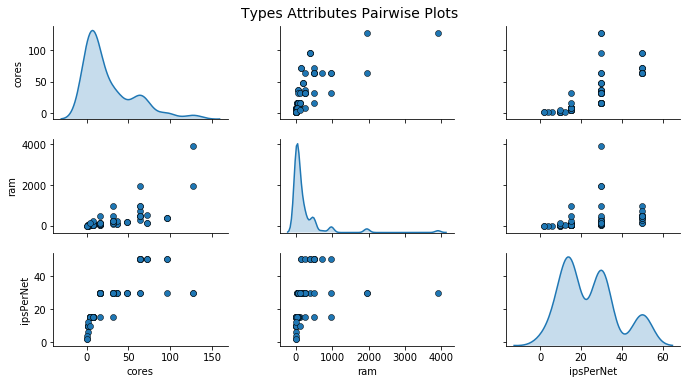

In [4]:
cols = ['cores', 'ram', 'ipsPerNet']
pp = sns.pairplot(aws[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Types Attributes Pairwise Plots', fontsize=14)

Text(0.5,0,'Nets')

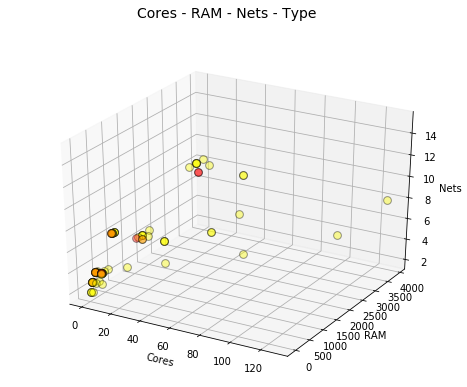

In [18]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Cores - RAM - Nets - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(aws['cores'])
ys = list(aws['ram'])
zs = list(aws['nets'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'C5' else 'yellow' for wt in list(aws['name'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=60)

ax.set_xlabel('Cores')
ax.set_ylabel('RAM')
ax.set_zlabel('Nets')